In [1]:
import pandas as pd
import numpy as np

## Calcluate R2 Score Using Model 

In [12]:
data = pd.read_excel('ex_model_data.xlsx')
data

,X,Y
0,15,49
1,23,63
2,18,58
3,23,60
4,24,58
5,22,61
6,22,60
7,19,63
8,19,60
9,16,52


In [13]:
x = data.iloc[:, 0:1]
y = data.iloc[:, -1]

print(x)
print(y)

print(type(x))
print(type(y))

     X
0   15
1   23
2   18
3   23
4   24
5   22
6   22
7   19
8   19
9   16
10  24
11  11
12  24
13  16
14  23
0     49
1     63
2     58
3     60
4     58
5     61
6     60
7     63
8     60
9     52
10    62
11    30
12    59
13    49
14    68
Name: Y, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
print(x.shape)
print(y.shape)

(15, 1)
(15,)


In [15]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x,y)

y_pred = lr.predict(x)
print(y_pred)

[47.45652174 62.60810811 53.13836663 62.60810811 64.5020564  60.71415981
 60.71415981 55.03231492 55.03231492 49.35047004 64.5020564  39.88072855
 64.5020564  49.35047004 62.60810811]


In [16]:
diff = pd.DataFrame({
    'Actual':y,
    'Predicted':y_pred
})
print(diff)

    Actual  Predicted
0       49  47.456522
1       63  62.608108
2       58  53.138367
3       60  62.608108
4       58  64.502056
5       61  60.714160
6       60  60.714160
7       63  55.032315
8       60  55.032315
9       52  49.350470
10      62  64.502056
11      30  39.880729
12      59  64.502056
13      49  49.350470
14      68  62.608108


In [17]:
print("Coefficent :",lr.coef_) # M
print("Intercept :",lr.intercept_) # C

Coefficent : [1.8939483]
Intercept : 19.047297297297284


In [18]:
from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y,y_pred)) # Abosulte Error
print("MSE :",metrics.mean_squared_error(y,y_pred)) # Sqaurd Error
print("R2 Score :",metrics.r2_score(y,y_pred))

MAE : 3.7412847630238946
MSE : 22.292068155111636
R2 Score : 0.7088287858527738


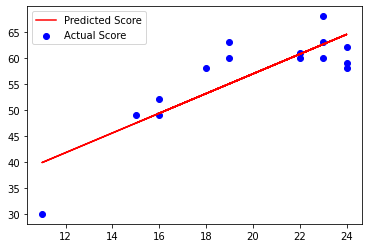

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color = 'blue',label = 'Actual Score')
plt.plot(x,y_pred,color = 'red',label='Predicted Score')
plt.legend()
plt.show()

R² score (linear fit): 0.96


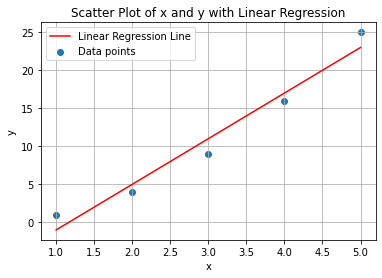

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])


model = LinearRegression()
model.fit(x.reshape(-1, 1), y) 
y_predicted = model.predict(x.reshape(-1, 1))

r2 = r2_score(y, y_predicted)
print(f"R² score (linear fit): {r2:.2f}")

plt.scatter(x, y, label="Data points")
plt.plot(x, y_predicted, color='red', label="Linear Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x and y with Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

# =============================================================

In [114]:
bdata = pd.read_csv('Book1.csv')
bdata

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [115]:
bdata.isna().sum()

cgpa       0
package    0
dtype: int64

In [116]:
bdata.dtypes

cgpa       float64
package    float64
dtype: object

In [117]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [118]:
x = bdata.iloc[:,0:1]
y = bdata.iloc[:,1]

print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [119]:
print(x)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]


In [120]:
print(y)

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [121]:
#Split the data in training & testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 19)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [122]:
#Creating LinearRegression Model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
print(y_pred)

[4.38757493 3.54100435 2.64260291 2.56773612 2.97662396 2.34313577
 3.34519891 3.17818838 2.37768967 4.12842067 3.65042503 2.78081852
 2.92479311 2.55045917 2.38344865 4.34726204 3.46613756 2.8211314
 3.23001923 2.71171071 3.08604464 2.21643813 2.63684393 3.00541888
 2.55045917 2.95358802 3.33943992 1.61750384 2.34889475 2.61380799
 1.93424793 2.14157134 3.21274228 3.22426025 3.77136369 3.73680979
 2.49286934 3.2069833  3.22426025 2.24523305]


In [123]:
diff = pd.DataFrame({
    'Actual': y_test,
    'Predicted':y_pred
})
print(diff)

     Actual  Predicted
40     4.02   4.387575
140    3.15   3.541004
33     2.73   2.642603
91     2.14   2.567736
13     2.89   2.976624
94     2.42   2.343136
148    3.40   3.345199
20     3.16   3.178188
196    2.57   2.377690
163    3.91   4.128421
31     3.89   3.650425
78     2.21   2.780819
16     2.35   2.924793
180    2.72   2.550459
37     2.43   2.383449
169    4.37   4.347262
72     3.62   3.466138
105    2.82   2.821131
152    3.08   3.230019
157    2.70   2.711711
117    2.99   3.086045
60     2.19   2.216438
62     2.09   2.636844
155    3.09   3.005419
190    2.69   2.550459
41     2.70   2.953588
59     3.31   3.339440
193    1.94   1.617504
132    2.48   2.348895
150    2.73   2.613808
1      1.98   1.934248
61     1.61   2.141571
34     3.42   3.212742
30     3.26   3.224260
26     3.42   3.771364
192    3.75   3.736810
8      2.31   2.492869
125    3.16   3.206983
64     2.92   3.224260
147    2.21   2.245233


In [124]:
print("Coefficent :",lr.coef_) # M
print("Intercept :",lr.intercept_) # C

Coefficent : [0.57589836]
Intercept : -1.0143516483691801


In [125]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.18405380979816172
MSE:  0.06222087452033198
R2 Score:  0.8416316029332689


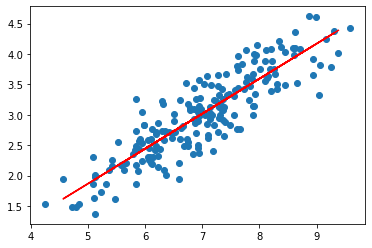

In [126]:
plt.scatter(bdata["cgpa"],bdata["package"])
plt.plot(x_test,y_pred,color="red")
plt.show()

In [134]:
 # Predict for 9.9
prediction = lr.predict([[8.5]])
print("Predict Package:",prediction)

Predict Package: [3.88078438]


0 0.7297167943957027
1 0.7283345498058083
2 0.780730147510384
3 0.6516754875100943
4 0.797266185221225
5 0.7576283066961189
6 0.7931883791241285
7 0.74999736702749
8 0.7750446547055034
9 0.7537489289007485
10 0.7681105472626018
11 0.7834680873599649
12 0.7814843672108371
13 0.7431142550564668
14 0.7319641370046674
15 0.6757798883208352
16 0.6056918235519968
17 0.6778264290984857
18 0.7524160321677125
19 0.8416316029332689
20 0.7415961128378261
21 0.8174090402563694
22 0.7507685626720515
23 0.7309298089286885
24 0.7575613457470172
25 0.8376622340186116
26 0.8048234457252446
27 0.7309557444768802
28 0.8060228914356113
29 0.6999434392546031
30 0.7196907227282943
31 0.7847458684928423
32 0.8086536217796094
33 0.7574974746709521
34 0.7150369641356499
35 0.8411951968894585
36 0.8106133427774883
37 0.7015301996955197
38 0.8236213089926823
39 0.7510679098555051
40 0.6462843124730797
41 0.7950830105648082
42 0.7730984312051673

[0.7297167943957027, 0.7283345498058083, 0.780730147510384, 0.65167

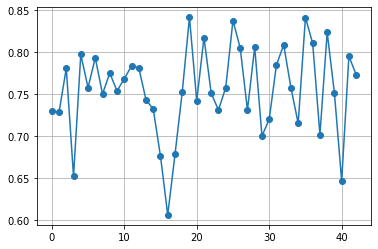

In [112]:
#Split the data in training & testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

x = bdata.iloc[:,0:1]
y = bdata.iloc[:,1]
lr=LinearRegression()
ac_ls = []
for i in range(0,43):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = i)
    
    #Creating LinearRegression Model
    
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_test)


    diff = pd.DataFrame({
        'Actual': y_test,
        'Predicted':y_pred
    })
    ans = metrics.r2_score(y_test,y_pred)
    print(i,ans)
    ac_ls.append(ans)

print()
print(ac_ls)

x = range(0,43)
plt.plot(x, ac_ls, marker = 'o')
plt.grid(True)
plt.show()

# =============================================================

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

In [2]:
dataset=pd.read_csv("Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
x=dataset[["TV","Radio","Newspaper"]]
y=dataset["Sales"]
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [4]:
#To check the type of x & y
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [7]:
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [8]:
diff=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
diff

,Actual,Predicted
58,23.8,21.735772
40,16.6,16.456938
34,9.5,7.659932
102,14.8,17.892027
184,17.6,18.677307
198,25.5,23.862719
95,16.9,16.336236
4,12.9,13.456492
29,10.5,9.177296
168,17.1,17.360562


In [15]:
#To get the Coefficient & Intercept
print('Coefficients:  ', lm.coef_)
print('Intercept:  ', lm.intercept_)
print()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('Coefficient of determination (R2 Score):', r2)

Coefficients:   [0.0468431  0.17854434 0.00258619]
Intercept:   2.907947020816433

Mean squared error: 1.99188555182879
Mean absolute error: 1.0402154012924716
Coefficient of determination (R2 Score): 0.8927605914615384


## Standerd Scaler : for converting types like some data are In KG and Some in Gm , so according that our coefficent will not that much rt , so we need to scale our training data which we provide to model and transform testing data.

In [16]:
# as example write after Traning Testing Split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler_data = scaler.fit_transform(x_train)
x_test_scaler_data = scaler.transform(x_test)

#provide this two values of x in our steps.
#this is not in our syllabus

# X_scaled = (X - meanofX) / sd

# =============================================================

In [18]:
inso = pd.read_csv("insurance.csv")
inso

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [19]:
inso.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [20]:
inso.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [21]:
df = pd.get_dummies(data = inso,drop_first=True)
df.head(10)

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
5,31,25.7,0,3756.62,0,0,0,1,0
6,46,33.4,1,8240.59,0,0,0,1,0
7,37,27.7,3,7281.51,0,0,1,0,0
8,37,29.8,2,6406.41,1,0,0,0,0
9,60,25.8,0,28923.14,0,0,1,0,0


In [23]:
x = df[["age","bmi","smoker_yes"]]
y = df["expenses"]

print(x.shape)
print(y.shape)

(1338, 3)
(1338,)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=11)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 3)
(268, 3)
(1070,)
(268,)


In [35]:
mul = LinearRegression()
mul.fit(x_train,y_train)
y_pred = mul.predict(x_test)

print(y_pred)

[27905.2052798   6075.76969321 10008.1128505   6261.38426231
 11966.65278276 11281.10640501  8040.82906983 16407.74848104
 12650.12852429 33486.06617008  7276.58805631 16202.49869496
 10682.84474361  3010.21555856  5743.8878729  36060.4323445
  4529.87685326   377.02061712  7890.1898944  13918.67327067
 10147.86065736  2287.54626699  4008.00853964  5010.25032885
  5012.397849   14577.98810316  5289.74594257  8230.81556313
 26940.16328833  7986.29534309 32876.91314012 29483.92599328
  3025.47885134  -216.86912007 31494.85213213 14126.07057689
  6296.28277207 25833.22596986 10398.97720568  8780.98605823
  6053.91007217 12971.04209211 28029.68979389  1261.29733659
  8350.92815301 11894.63135919 30966.46437416  3909.75557081
  9272.32778631 26988.17757071 13877.17843264 29654.12350177
 15813.85874385 35951.21112319 10778.87330838  3848.6255158
  6608.5293754  13431.78035072 10141.34121301  3025.47885134
  7960.06379783 14047.45282504 10990.71942273 37745.99610739
  4619.46285759  7676.1962

In [36]:
temp_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
print(temp_df.head(20))

        Actual     Predicted
1313  36397.58  27905.205280
1254   4415.16   6075.769693
372    7639.42  10008.112851
937    8965.80   6261.384262
484    9563.03  11966.652783
447   11454.02  11281.106405
220    5012.47   8040.829070
246   12648.70  16407.748481
920   13451.12  12650.128524
1070  39871.70  33486.066170
1058   2480.98   7276.588056
386   11856.41  16202.498695
980   25517.11  10682.844744
135    2155.68   3010.215559
1298   5261.47   5743.887873
664   27037.91  36060.432344
1182   2632.99   4529.876853
899    2117.34    377.020617
43     6313.76   7890.189894
433   12638.20  13918.673271


In [37]:
print("Coefficent :",mul.coef_)
print("Intercept :",mul.intercept_)

Coefficent : [  266.37984109   327.5098961  23532.56393024]
Intercept : -12053.169025907573


In [38]:
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("R2 Score :",metrics.r2_score(y_test,y_pred))

MAE : 3784.3611000363685
MSE : 27581739.22116713
R2 Score : 0.801102111923785


# =============================================================

In [64]:
ful = pd.read_csv("FuelConsumptionCo2.csv")
ful.head(20)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [66]:
ful.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [67]:
ful.drop('FUELTYPE',axis=1,inplace=True)
ful

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,12.9,9.3,11.3,25,260


In [68]:
#Converting Model year to age column
ful['Age']=2023-ful['MODELYEAR']

ful.drop(labels='MODELYEAR',axis=1,inplace=True)
ful

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,Age
0,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,33,196,9
1,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,29,221,9
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,48,136,9
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,25,255,9
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,27,244,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,13.4,9.8,11.8,24,271,9
1063,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,13.2,9.5,11.5,25,264,9
1064,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,13.4,9.8,11.8,24,271,9
1065,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,12.9,9.3,11.3,25,260,9


In [69]:
x=ful[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','Age']]
y=ful['CO2EMISSIONS']

print(x.shape)
print(y.shape)

(1067, 4)
(1067,)


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ",y_test.shape)

x train:  (853, 4)
x test:  (214, 4)
y train:  (853,)
y test:  (214,)


In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([214.58357275, 387.83515037, 369.23735994, 306.26538599,
       185.62059756, 316.67218891, 345.85546202, 241.52144122,
       301.14327219, 274.44895214, 232.16084671, 370.45736525,
       280.06530885, 255.28716728, 185.66465714, 187.49271646,
       318.72054614, 383.87061465, 264.86805971, 298.26900446,
       261.64131532, 319.67863538, 205.96076957, 197.24984722,
       254.19689929, 206.91885881, 260.03355391, 204.264889  ,
       186.62274638, 302.69738651, 247.53433417, 321.59481387,
       239.60526274, 305.04293925, 249.45051266, 271.48656524,
       378.86231195, 234.68263777, 191.58943093, 186.79898471,
       210.75121578, 256.24525652, 256.15713736, 253.28286963,
       197.33796638, 186.53462722, 298.42443371, 257.1152266 ,
       326.044005  , 278.36942827, 294.50395758, 326.38526008,
       211.88554335, 201.08220419, 287.92951163, 320.50454588,
       237.46878634, 306.39756473, 204.04459108, 183.83659782,
       258.07331584, 347.59540217, 249.36239349, 162.84

In [72]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
temp_df

,Actual,Predicted
363,235,214.583573
216,344,387.835150
13,359,369.237360
556,306,306.265386
497,177,185.620598
...,...,...
607,193,197.337966
977,159,180.962330
586,278,264.779941
495,159,177.955884


In [73]:
print("Coefficent :",lr.coef_)
print("Intercept :",lr.intercept_)

Coefficent : [10.02148826  7.97914549  9.58089243  0.        ]
Intercept : 64.89891153798644


In [74]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('R2 Score: ', metrics.r2_score(y_test,y_pred))

MAE:  15.016970621647848
MSE:  419.47899727914
R2 Score:  0.8936913135355137


# =============================================================

# Polynomial Regression

# =============================================================

In [157]:
poly = pd.read_csv("polylinearregression.csv")
poly

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [158]:
poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 272.0 bytes


In [159]:
poly.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [160]:
x = poly.iloc[:,1:2]
y = poly.iloc[:,-1]
print(x.shape)
print(y.shape)

(6, 1)
(6,)


In [167]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
x_Poly = poly.fit_transform(x)
print(x.shape)
print()
print(x_Poly.shape)
print(x_Poly)

(6, 1)

(6, 6)
[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.0000e+01 4.0000e+02 8.0000e+03 1.6000e+05 3.2000e+06]
 [1.0000e+00 4.0000e+01 1.6000e+03 6.4000e+04 2.5600e+06 1.0240e+08]
 [1.0000e+00 6.0000e+01 3.6000e+03 2.1600e+05 1.2960e+07 7.7760e+08]
 [1.0000e+00 8.0000e+01 6.4000e+03 5.1200e+05 4.0960e+07 3.2768e+09]
 [1.0000e+00 1.0000e+02 1.0000e+04 1.0000e+06 1.0000e+08 1.0000e+10]]


In [168]:
# Fitting the Polynomial Regression model on two components X and y.

lr = LinearRegression()
lr.fit(x_Poly, y)
y_pred=lr.predict(x_Poly)
y_pred

array([2.00000474e-04, 1.20000008e-03, 5.99999994e-03, 3.00000000e-02,
       8.99999999e-02, 2.70000000e-01])

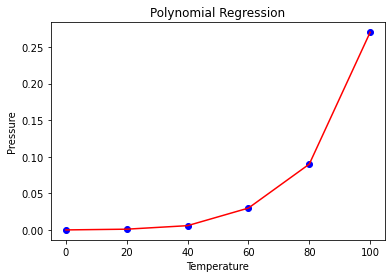

In [169]:
plt.scatter(x,y, color="blue")
plt.plot(x,y_pred, color="red")
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [170]:
("R2 Score",metrics.r2_score(y,y_pred))

('R2 Score', 1.0)

# =============================================================

In [132]:
carr = pd.read_csv("car_data.csv")
carr

,Horsepower,Weight,MPG
0,130,3504,18
1,165,3693,15
2,150,3436,18
3,140,3433,16
4,198,4341,14
5,220,4354,12
6,95,2372,25
7,88,2130,27
8,98,2228,24


In [133]:
carr.isna().sum()

Horsepower    0
Weight        0
MPG           0
dtype: int64

In [172]:
x = carr[['Horsepower','Weight']]
y = carr['MPG']

print(x.shape)
print(y.shape)

(9, 2)
(9,)


In [173]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
print(x_poly.shape)

(9, 6)


In [174]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
    
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 6)
(2, 6)
(7,)
(2,)


In [175]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
print(y_pred)

[26.13943725 15.58820187]


In [176]:
print("R2 Score :",metrics.r2_score(y_test,y_pred))

R2 Score : 0.9849090319767477


# =============================================================